In [2]:
import os
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

import openpyxl

In [3]:
output_path = os.path.join('C:\\','projects','pg_risk_analysis_output','output')
risk_path = os.path.join(output_path,'risk')
figure_path = os.path.join('C:\\','projects','pg_risk_analysis_output','output','figures')

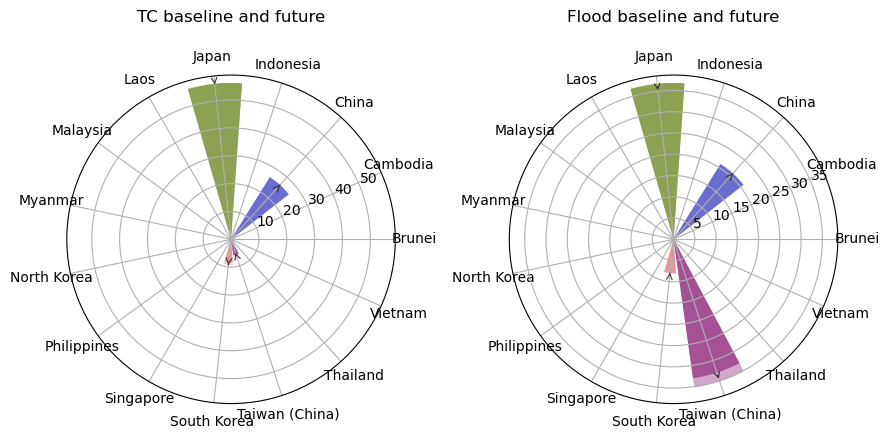

In [142]:
data = pd.read_excel(os.path.join(figure_path,'Table 2_S5_analysis.xlsx'), sheet_name='polar_tc')

countries = data["Country"]
ead_columns = [
    "Country EAD to total EAD (TC present %)",
    "Country EAD to total EAD (TC future %)",
    "Country EAD to total EAD (flood present %)",
    "Country EAD to total EAD (flood future %)",
]

# Normalize the data
total_data = data[ead_columns].sum(axis=0)
normalized_data = data[ead_columns].div(total_data, axis=1) * 100

num_countries = len(countries)
theta = np.linspace(0, 2 * np.pi, num_countries, endpoint=False)

fig, axs = plt.subplots(1, 2, figsize=(9,5), subplot_kw=dict(polar=True))

titles = [
    "TC baseline and future",
    "Flood baseline and future",
]

# Define a list of unique colors for each country
num_colors = len(countries)
colors = plt.cm.tab20b(np.linspace(0,1, num_colors))

# Select the indices of the countries you want arrows for
arrow_countries_indices = [countries[countries == 'Japan'].index[0],
                           countries[countries == 'South Korea'].index[0],
                           countries[countries == 'Taiwan (China)'].index[0],
                           countries[countries == 'China'].index[0]]

for i, ax in enumerate(axs.flat):
    ax.set_title(titles[i], pad=20)

    if i == 0:  # For TC present and future
        present_values = normalized_data[ead_columns[0]].tolist()
        future_values = normalized_data[ead_columns[1]].tolist()
        labels = ["TC"] * len(countries)  # Use same label for both present and future
    else:  # For Flood present and future
        present_values = normalized_data[ead_columns[2]].tolist()
        future_values = normalized_data[ead_columns[3]].tolist()
        labels = ["Flood"] * len(countries)  # Use same label for both present and future

    # Set different colors for present and future bars
    bars1 = ax.bar(theta, present_values, width=0.35, color=colors, label='Baseline')
    bars2 = ax.bar(theta, future_values, width=0.35, color=colors, alpha=0.5, label='Future')

    # Add variation arrows between present and future bars for specific countries
    for j, (bar1, bar2) in enumerate(zip(bars1, bars2)):
        if j in arrow_countries_indices:
            ax.annotate(
                '',
                xy=(bar2.get_x() + bar2.get_width() / 2, bar2.get_height()),
                xytext=(bar1.get_x() + bar1.get_width() / 2, bar1.get_height()),
                arrowprops=dict(arrowstyle='->', color='#323232', lw=0.8)
            )

    ax.set_xticks(theta)
    ax.set_xticklabels(countries, fontsize=10, ha='center', rotation=45)

# Adjust the space between subplots
plt.tight_layout()

plt.show()

In [81]:
data = pd.read_excel(os.path.join(figure_path,'Table 2_S5_analysis.xlsx'), sheet_name='pie_chart')

countries = data["Country"]
ead_columns = [
    "Country EAD to total EAD (TC present %)",
    "Country EAD to total EAD (TC future %)",
    "Country EAD to total EAD (flood present %)",
    "Country EAD to total EAD (flood future %)",
]

# Combine 'present' and 'future' data for TC and Flood
data['TC EAD'] = data[ead_columns[0]] + data[ead_columns[1]]
data['Flood EAD'] = data[ead_columns[2]] + data[ead_columns[3]]

normalized_data = data[['TC EAD', 'Flood EAD']].div(data[['TC EAD', 'Flood EAD']].sum(axis=0), axis=1) * 100

num_countries = len(countries)
theta = np.linspace(0, 2 * np.pi, num_countries, endpoint=False)

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))

ax.set_title("TC and Flood", pad=20)

# Use different colors for 'present' and 'future' bars of each country
colors_present = plt.cm.tab20c(np.linspace(0, 1, num_countries))
colors_future = plt.cm.tab20b(np.linspace(0, 1, num_countries))

# Width of each bar (adjust for spacing)
bar_width = 0.35

# Plot 'present' bars
bars_present = ax.bar(theta, normalized_data['TC EAD'], width=bar_width, color=colors_present, label='Present')

# Plot 'future' bars on top of 'present' bars
bars_future = ax.bar(theta, normalized_data['Flood EAD'], width=bar_width, color=colors_future, alpha=0.7, label='Future')

ax.set_xticks(theta)
ax.set_xticklabels(countries, fontsize=12, ha='center', rotation=45)

ax.set_rlabel_position(22.5)

ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (2176457250.py, line 44)